# Info

Introduction to the module atmPy.aerosols.instruments.POPS.file_io. This module is a collection of functions that help opening the different file types generated with a POPS instrument. The functions are merely pointing the functions that are defined in the designated modules.

# imports

In [1]:
import  atmPy.aerosols.instruments.POPS.file_io as popsio

# HK (Housekeeping) files

Historically these files contained houskeeping only and binned data only for quick-checks. These days, the HK files are used to extract the size distribution itself and replaced the "peak" files as the most relevant files. In fact the peak files are often not even saved anymore.

In [2]:
reload(popsio)
reload(popsio.atmpopshk)

<module 'atmPy.aerosols.instruments.POPS.housekeeping' from '/mnt/telg/prog/atm-py/atmPy/aerosols/instruments/POPS/housekeeping.py'>

In [3]:
hk = popsio.read_hk_file('data/HK_20211111x003.csv',
                            version='BBB_02',
                            pattern='HK',
                            size_bins='data/Dp100_1p76.txt',
                            skip_histogram=False,
                            ignore_colums=[],
                            verbose=False,)

In [4]:
dist = hk['sizedistribution']

In [10]:
# you might want to rebin the data to get equaly spaced bins
dist = dist.re_bin(number_of_bins=50)

In [6]:
dist = dist.convert2dNdlogDp()

In [7]:
#The following adds an altitude to the housekeeping
#Note, this is a very simple approximation of the altitude!!!! You will probably want to use an exteranlly measuremd altitude?!?
dist.housekeeping.data['Altitude'] = dist.housekeeping.get_altitude() 

In [8]:
dist_vp = dist.convert2verticalprofile(layer_thickness=10)

(<Figure size 1560x1040 with 4 Axes>,
 (<AxesSubplot:xlabel='Particle diameter (nm)', ylabel='$\\mathrm{d}N\\,/\\,\\mathrm{d}log(D_{P})$ (cm$^{-3}$)'>,
  <AxesSubplot:xlabel='Particle diameter (nm)', ylabel='Altitude (m)'>,
  <AxesSubplot:xlabel='Concentration (cm$^{-3}$)'>))

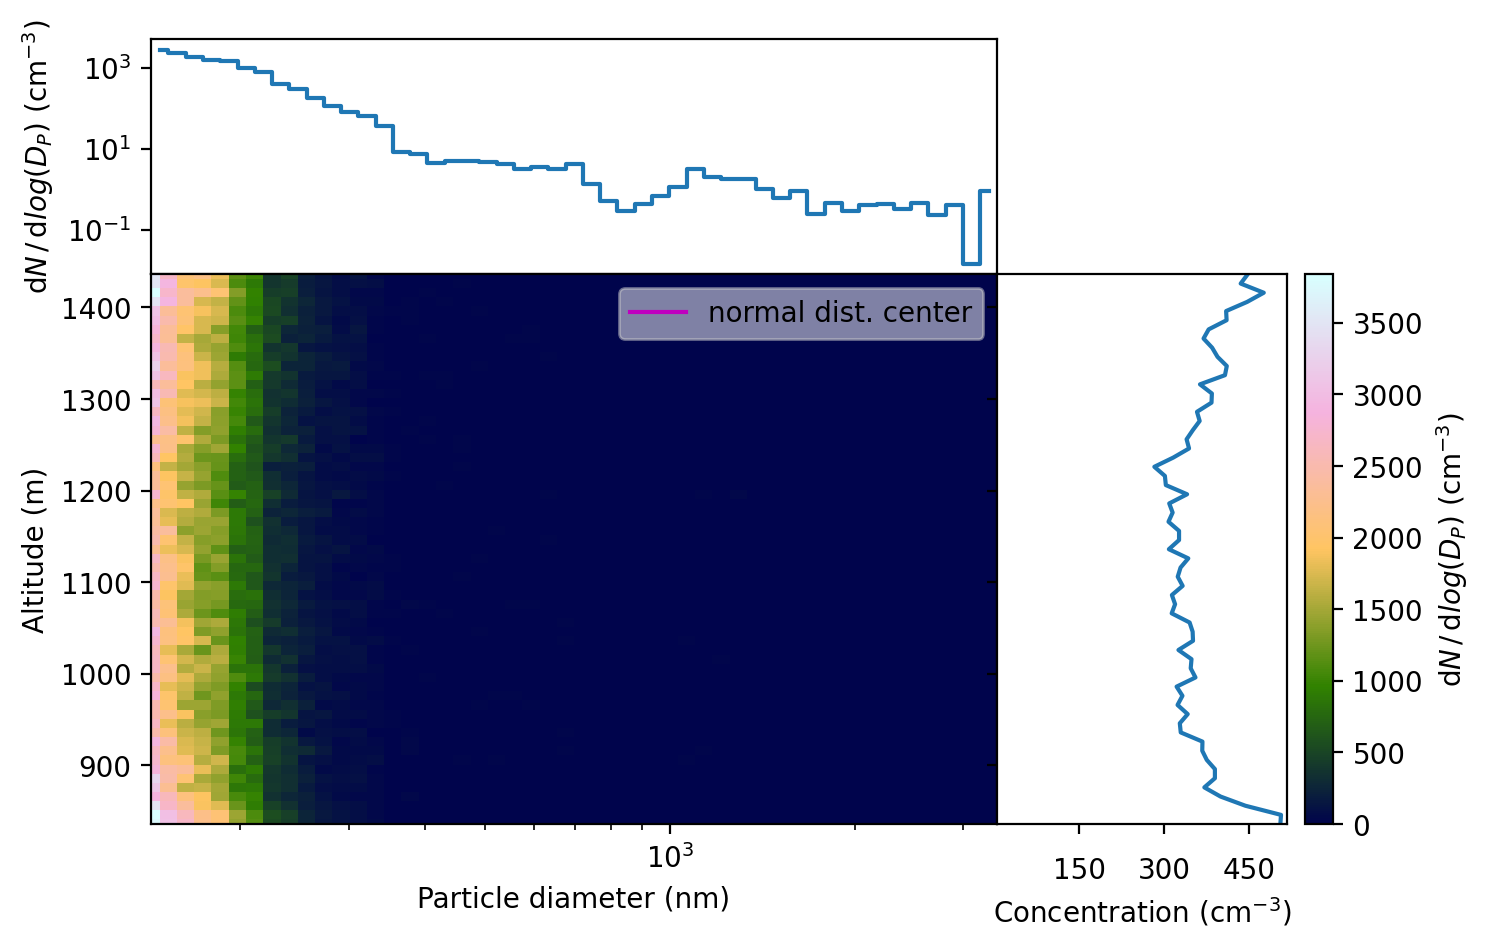

In [9]:
dist_vp.plot_overview()